Use SVD to do principle component anaysis(PCA).

In [0]:
import numpy as np
from numpy import linalg as la
from skimage import io

In [0]:
path = "C:/Users/CivilKen/GoogleDrive/ML_hw/hw4"
X = np.load(path+'/'+'X300.npy')

In [0]:
Xmean = np.mean(X, axis=1)
Xdiff = np.zeros(X.shape)
for i in range(len(X)):
  Xdiff[i,:] = X[i,:]-Xmean[i]

In [0]:
Xu, Xs, Xvh = la.svd(Xdiff, full_matrices=False)

In [0]:
n_comps = 10
U = Xu[:,0:n_comps]

In [0]:
# randomly choose an image as y
y = np.matrix.transpose(X[:,100])
weights = np.dot(y,U)

In [0]:
print(np.dot(np.matrix.transpose(X[:,239]),U))
print(np.dot(np.matrix.transpose(X[:,100]),U))
print(np.dot(np.matrix.transpose(X[:,50]),U))

[ 67.98341996   1.36151313 -54.63644571  23.54422704 -42.85013603
  -8.49196626   4.72090505 -37.12493903 -27.00784069  -0.10988239]
[ 95.88167861   0.72239205 -49.8457479   20.91070217 -48.35452412
  -4.72294215   0.72017159 -18.78883038 -14.67349498  -1.78535089]
[ 76.83857588   1.56292419 -35.32141781   0.18450738 -45.26215883
 -12.81620485  12.10148666 -27.40680688 -18.27860341  -0.70438159]


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


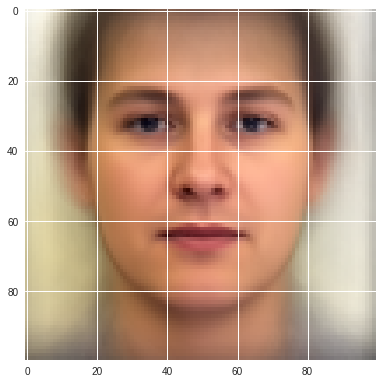

In [0]:
#M = np.zeros((U[:,0].shape))
M = Xmean
for i in range(n_comps):
  M += weights[i]/sum(weights)*U[:,i]
  

M -= np.min(M)
M /= np.max(M)
M = (M*255).astype(np.uint8)

XM = np.resize(M,(100,100,3))
io.imshow(XM)

In [0]:
Xu -= np.min(Xu)
Xu /= np.max(Xu)
Xu = (Xu*255).astype(np.uint8)

In [0]:
print(Xu.shape)
print(Xs.shape)
print(Xvh.shape)

(30000, 415)
(415,)
(415, 415)


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


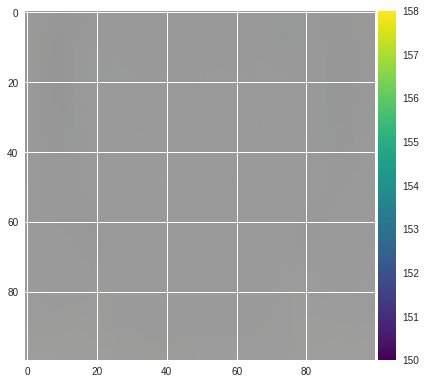

In [0]:
Xtest = np.resize(Xu[:,1],(100,100,3))
io.imshow(Xtest)